In [1]:
# 导入库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
from datetime import datetime

#  初识数据

In [2]:
df=pd.read_csv(r'D:\DATA ANALYSIS\kelu.csv')
df

,author,rating,time,year,amount,frequency
0,YOUNG,60,2019/2/28,2019,110,1
1,SHING YAN,100,2019/2/28,2019,110,1
2,Sha,60,2019/2/28,2019,110,1
3,Mary Mae,100,2019/2/28,2019,110,1
4,Maria Cristina,100,2019/2/28,2019,110,1
...,...,...,...,...,...,...
8752,Jonathan,100,2016/8/6,2016,110,1
8753,Oliver Stephen Ah Kam,100,2016/8/5,2016,110,1
8754,Halley,100,2016/8/5,2016,110,1
8755,ANDREW WEIQIANG,100,2016/8/3,2016,110,1


In [3]:
df.info()
# 基本信息：门票价格110，数据来自16年-19年，8千多数据量

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8757 entries, 0 to 8756
Data columns (total 6 columns):
author       8757 non-null object
rating       8757 non-null int64
time         8757 non-null object
year         8757 non-null int64
amount       8757 non-null int64
frequency    8757 non-null int64
dtypes: int64(4), object(2)
memory usage: 410.6+ KB


In [4]:
df.describe()
# 根据平均分92和1/2分位得知，大多数用户评分在100，效果非常不错
#16-19年门票价格都是110，没有涨价

,rating,year,amount,frequency
count,8757.000000,8757.000000,8757.0,8757.0
mean,92.417495,2017.760420,110.0,1.0
std,14.231179,0.686734,0.0,0.0
min,20.000000,2016.000000,110.0,1.0
25%,80.000000,2017.000000,110.0,1.0
50%,100.000000,2018.000000,110.0,1.0
75%,100.000000,2018.000000,110.0,1.0
max,100.000000,2019.000000,110.0,1.0


# 分析数据

## 每天销量分析

In [5]:
# 字符串转化成时间类型格式，用年月日显示，然后取出这列
df['time']=pd.to_datetime(df['time'],format='%Y/%m/%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8757 entries, 0 to 8756
Data columns (total 6 columns):
author       8757 non-null object
rating       8757 non-null int64
time         8757 non-null datetime64[ns]
year         8757 non-null int64
amount       8757 non-null int64
frequency    8757 non-null int64
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 410.6+ KB


In [6]:
df.groupby('time')['rating'].count() #用time列分组，随便取一列，然后计数

time
2016-08-02     1
2016-08-03     1
2016-08-05     2
2016-08-06     1
2016-08-07     1
              ..
2019-02-24    21
2019-02-25    20
2019-02-26    17
2019-02-27    15
2019-02-28    15
Name: rating, Length: 895, dtype: int64

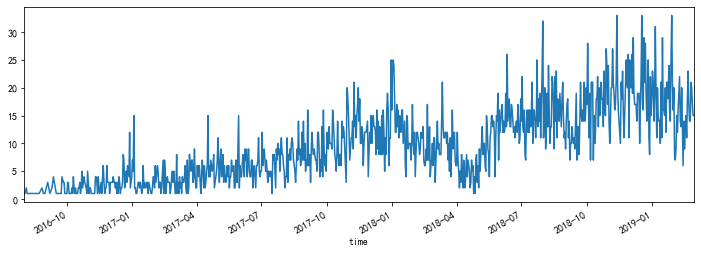

In [7]:
df.groupby('time')['rating'].count().plot(figsize=(12,4))
# 整体来看每日销量呈现上升趋势，但是在18年5月前后（2，3，4）出现一次较大的波动，销量急剧下滑，有可能是台风影响，或者运营推广不利
# 16年9月-17年1月，销量非常仰慕，每天平均2-3张门票，猜测：101观景台门票刚刚上线发售，观景台刚刚开放

## 每月的销量分析

In [8]:
# 取出time列的值，转换成时间格式，精确到月份
df['month']=df['time'].values.astype('datetime64[M]') #保留月份精度的日期
df.head()

,author,rating,time,year,amount,frequency,month
0,YOUNG,60,2019-02-28,2019,110,1,2019-02-01
1,SHING YAN,100,2019-02-28,2019,110,1,2019-02-01
2,Sha,60,2019-02-28,2019,110,1,2019-02-01
3,Mary Mae,100,2019-02-28,2019,110,1,2019-02-01
4,Maria Cristina,100,2019-02-28,2019,110,1,2019-02-01


Text(0.5, 1.0, '16-19年每月销量分析')

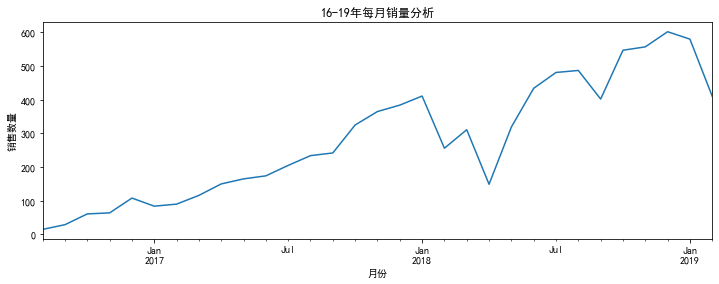

In [9]:
 # 按照月份进行计数
df.groupby('month')['rating'].count().plot(figsize=(12,4))
plt.xlabel('月份')
plt.ylabel('销售数量')
plt.title('16-19年每月销量分析')
# 月份整体销量依然呈现上升趋势，但是在18年2，3，4月份销量下滑明显。跟每天销量下降有关。

## 每个用户的购买量和消费金额分析

In [10]:
# merge用法 ，相当于sql当中join:
df1=pd.DataFrame({
    'name':['zhangsan','lisi'],
    'group':['A','B']
})
df2=pd.DataFrame({
    'name':['zhangsan','lisi'],
    'score':[88,90]
})
pd.merge(left=df1,right=df2,on='name')

,name,group,score
0,zhangsan,A,88
1,lisi,B,90


In [11]:
# merge用法 ，相当于sql当中join:
df1=pd.DataFrame({
    'name':['zhangsan','lisi'],
    'group':['A','B']
})
df2=pd.DataFrame({
    'name':['wangwu','lisi'],
    'score':[88,90],
    'group':['C','D']
})
pd.merge(left=df1,right=df2,on='name',how='inner',suffixes=['_1','_2'])
# left:左表  right:右表 on:关联字段  how:inner(默认值，交集)|outer(并集)|left(只保留左侧)|right(只保留右侧)
# suffixes:如果两个表中有多个相同列，用这个函数给的值 进行区分(默认值xy)

,name,group_1,score,group_2
0,lisi,B,90,D


In [12]:
# 按照游客分组，统计每个游客的购买次数
grouped_count_author=df.groupby('author')['frequency'].count().reset_index()
# 按照游客分组，统计每个游客的消费金额
grouped_sum_amount=df.groupby('author')['amount'].sum().reset_index()
grouped_sum_amount.tail(60)

,author,amount
7662,yueah cin,110
7663,yuen ha,110
7664,yuen ping michelle,220
7665,yuh-ming,110
7666,yuhao,110
7667,yuhuan,110
7668,yuk wa,110
7669,yuk yin,110
7670,yuki,110
7671,yukshan,110


In [13]:
grouped_count_author.tail(60)

,author,frequency
7662,yueah cin,1
7663,yuen ha,1
7664,yuen ping michelle,2
7665,yuh-ming,1
7666,yuhao,1
7667,yuhuan,1
7668,yuk wa,1
7669,yuk yin,1
7670,yuki,1
7671,yukshan,1


Text(0, 0.5, '消费金额')

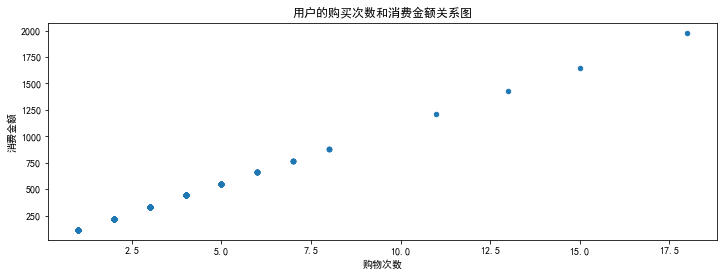

In [14]:
user_purchase_retention=pd.merge(left=grouped_count_author,
                                right=grouped_sum_amount,
                                on='author',
                                how='inner')
user_purchase_retention.tail(60)
user_purchase_retention.plot.scatter(x='frequency',y='amount',figsize=(12,4))
plt.title('用户的购买次数和消费金额关系图')
plt.xlabel('购物次数')
plt.ylabel('消费金额')
# 结论，斜率就是门票的价格110，用户的消费金额和消费次数呈现线性关系

## 用户购买门票数量分析

Text(0.5, 1.0, '用户购买门票数量直方图')

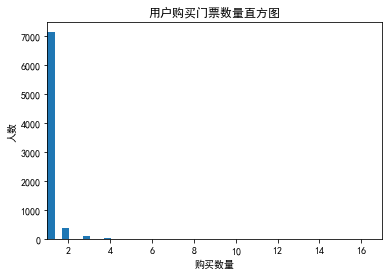

In [15]:
df.groupby('author')['frequency'].count().plot.hist(bins=50)# 影响柱子的宽度，宽度=（最大值 -最小值）/bins
plt.xlim(1,17)
plt.xlabel('购买数量')
plt.ylabel('人数')
plt.title('用户购买门票数量直方图')
# 绝大多数用户购买过1张门票，用户在7000人次左右
# 少数人购买过2-4张门票，猜测是台北周边用户

## 用户购买门票2次及以上情况分析

In [16]:
df_frequency_2=df.groupby('author').count().reset_index()
df_frequency_2.head()

,author,rating,time,year,amount,frequency,month
0,wenbiao,1,1,1,1,1,1
1,Goh Yu Wen Eunice,1,1,1,1,1,1
2,Hui Shan,1,1,1,1,1,1
3,Huihui,1,1,1,1,1,1
4,KO-CHENG,1,1,1,1,1,1


In [17]:
df_frequency_2[df_frequency_2['frequency']>=2]

,author,rating,time,year,amount,frequency,month
49,ANGELINA,3,3,3,3,3,3
74,ARLENE,4,4,4,4,4,4
83,Aaron,3,3,3,3,3,3
90,Abigail,6,6,6,6,6,6
93,Ace,2,2,2,2,2,2
...,...,...,...,...,...,...,...
7615,yanyan,2,2,2,2,2,2
7626,yewon,2,2,2,2,2,2
7646,yinung,2,2,2,2,2,2
7660,yu,2,2,2,2,2,2


Text(0.5, 1.0, '购买门票在2次及以上的用户数量')

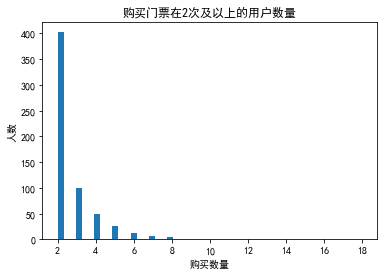

In [18]:
df_frequency_2[df_frequency_2['frequency']>=2].groupby('author')['frequency'].sum().plot.hist(bins=50)
plt.xlabel('购买数量')
plt.ylabel('人数')
plt.title('购买门票在2次及以上的用户数量')
# 消费2次的用户在整体上占比比较大，大于2次的用户占小部分，用户购买次数最多为8次

## 查看购买2次及以上的具体人数

In [19]:
df_frequency_2[df_frequency_2['frequency']>=2]

,author,rating,time,year,amount,frequency,month
49,ANGELINA,3,3,3,3,3,3
74,ARLENE,4,4,4,4,4,4
83,Aaron,3,3,3,3,3,3
90,Abigail,6,6,6,6,6,6
93,Ace,2,2,2,2,2,2
...,...,...,...,...,...,...,...
7615,yanyan,2,2,2,2,2,2
7626,yewon,2,2,2,2,2,2
7646,yinung,2,2,2,2,2,2
7660,yu,2,2,2,2,2,2


In [20]:
df_frequency_2[df_frequency_2['frequency']>=2].groupby('frequency')['author'].count()
# 除去购买1次的顾客，可以看出购买2次的有402人，购买3次的有99人，以此类推得知，大多数人倾向于购买2-5次

frequency
2     402
3      99
4      49
5      25
6      13
7       7
8       4
11      1
13      1
15      1
18      1
Name: author, dtype: int64

## 购买次数在1-5次之间的用户占比分析

In [21]:
# 对用户author进行分组  取出消费频率  进行逻辑判断（1-5） 数据可视化（pie)
df_frequency_gte_1=df.groupby('author')['frequency'].count().reset_index() # gte是>=的意思
df_frequency_gte_1.tail(60)

,author,frequency
7662,yueah cin,1
7663,yuen ha,1
7664,yuen ping michelle,2
7665,yuh-ming,1
7666,yuhao,1
7667,yuhuan,1
7668,yuk wa,1
7669,yuk yin,1
7670,yuki,1
7671,yukshan,1


In [22]:
#购买次数>=1
df_frequency_gte_1=df_frequency_gte_1[df_frequency_gte_1['frequency']>=1]
#购买次数<=5,对frequency进行分给，取出frequency这列，然后计数
values=df_frequency_gte_1[df_frequency_gte_1['frequency']<=5].groupby('frequency')['frequency'].count()
values

frequency
1    7119
2     402
3      99
4      49
5      25
Name: frequency, dtype: int64

In [23]:
#把 series转成list类型才能绘制饼图
values=list(df_frequency_gte_1[df_frequency_gte_1['frequency']<=5].groupby('frequency')['frequency'].count())
values

[7119, 402, 99, 49, 25]

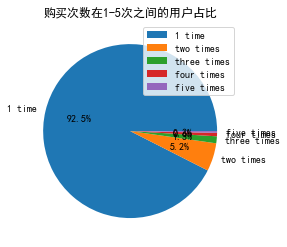

In [24]:
# 绘制饼图
labels=['1 time','two times','three times','four times','five times']
plt.pie(values,labels=labels,autopct='%1.1f%%')
plt.title('购买次数在1-5次之间的用户占比')
plt.legend()

In [ ]:
# 因为上面的图很密集，所以我们把1次的顾客砍掉，分析购买2-5次的

## 购买次数在2-5次之间的用户占比分析

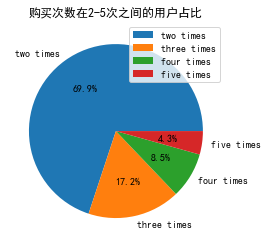

In [26]:
# 对用户author进行分组  取出消费频率  进行逻辑判断（2-5） 数据可视化（pie)
df_frequency_gte_2=df.groupby('author')['frequency'].count().reset_index() # gte是>=的意思
df_frequency_gte_1.tail(60)
#购买次数>=2
df_frequency_gte_2=df_frequency_gte_2[df_frequency_gte_2['frequency']>=2]
#购买次数<=5,对frequency进行分给，取出frequency这列，然后计数
values=list(df_frequency_gte_2[df_frequency_gte_2['frequency']<=5].groupby('frequency')['frequency'].count())
values
# 绘制饼图
labels=['two times','three times','four times','five times']
plt.pie(values,labels=labels,autopct='%1.1f%%')
plt.title('购买次数在2-5次之间的用户占比')
plt.legend()
# 在购物次数在2-5次的用户中，其中消费2次的占比70%，消费3次占比17%，4次占比8.5%，5次占比4.3%
# 消费2-3次的用户依然很重要
# 消费次数在4-5次比重较少，需要针对性的对2-3次的用户进行引导
# 消费次数在1次的用户，可以尝试转化到消费2-3次

## 复购率分析

In [27]:
# 复购率：在某一时间窗口内（多指一个月）内消费次数在两次及以上的用户在总消费用户的占比
df.head()

,author,rating,time,year,amount,frequency,month
0,YOUNG,60,2019-02-28,2019,110,1,2019-02-01
1,SHING YAN,100,2019-02-28,2019,110,1,2019-02-01
2,Sha,60,2019-02-28,2019,110,1,2019-02-01
3,Mary Mae,100,2019-02-28,2019,110,1,2019-02-01
4,Maria Cristina,100,2019-02-28,2019,110,1,2019-02-01


In [28]:
pivot_count=df.pivot_table(index='author',
                           columns='month',
                           values='frequency',
                           aggfunc='count').fillna(0)
pivot_count.head()

month,2016-08-01,2016-09-01,2016-10-01,2016-11-01,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,...,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01
author,,,,,,,,,,,,,,,,,,,,,
wenbiao,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Goh Yu Wen Eunice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hui Shan,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Huihui,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KO-CHENG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# 三种情况：
#消费次数>1，为复购用户，用1表示
#消费次数=1，为非复购用户，用0表示
#消费次数=0，为未消费用户，用na表示

#applymap:df,处理每一个元素
#apply:df，处理每一行（axis=1)或者每一列数据（axis=0)
#map:Serise,处理每一个元素（在一维数组中）

# 处理完变量之后，重新存到pivot_count里
pivot_count=pivot_count.applymap(lambda x:1 if x>1 else np.NAN if x==0 else 0)
pivot_count.head()

month,2016-08-01,2016-09-01,2016-10-01,2016-11-01,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,...,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01
author,,,,,,,,,,,,,,,,,,,,,
wenbiao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
Goh Yu Wen Eunice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hui Shan,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Huihui,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KO-CHENG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
pivot_count.sum()#每月有多少人复购

month
2016-08-01     0.0
2016-09-01     2.0
2016-10-01     0.0
2016-11-01     0.0
2016-12-01     1.0
2017-01-01     0.0
2017-02-01     1.0
2017-03-01     0.0
2017-04-01     3.0
2017-05-01     3.0
2017-06-01     2.0
2017-07-01     1.0
2017-08-01     1.0
2017-09-01     4.0
2017-10-01     4.0
2017-11-01     4.0
2017-12-01     3.0
2018-01-01     6.0
2018-02-01     2.0
2018-03-01     2.0
2018-04-01     1.0
2018-05-01     5.0
2018-06-01     5.0
2018-07-01     5.0
2018-08-01     7.0
2018-09-01     9.0
2018-10-01     4.0
2018-11-01     7.0
2018-12-01    12.0
2019-01-01    10.0
2019-02-01     4.0
dtype: float64

In [31]:
pivot_count.count() #每月总的用户数（计数）

month
2016-08-01     15
2016-09-01     27
2016-10-01     61
2016-11-01     64
2016-12-01    107
2017-01-01     84
2017-02-01     89
2017-03-01    116
2017-04-01    147
2017-05-01    162
2017-06-01    169
2017-07-01    204
2017-08-01    233
2017-09-01    236
2017-10-01    321
2017-11-01    361
2017-12-01    381
2018-01-01    404
2018-02-01    254
2018-03-01    309
2018-04-01    148
2018-05-01    314
2018-06-01    429
2018-07-01    474
2018-08-01    479
2018-09-01    393
2018-10-01    543
2018-11-01    550
2018-12-01    588
2019-01-01    569
2019-02-01    406
dtype: int64

Text(0.5, 1.0, '16-19年每月用户复购率')

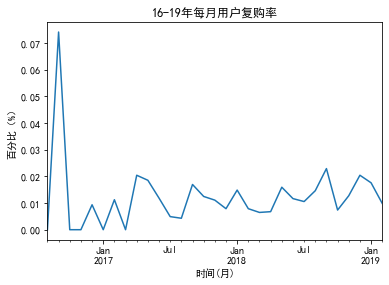

In [32]:
# 计算复购率并画出拆线图
(pivot_count.sum()/pivot_count.count()).plot()
plt.xlabel('时间(月)')
plt.ylabel('百分比（%）')
plt.title('16-19年每月用户复购率')
# 16年9月份复购率最高达到了7.5%，然后开始下降，趋于平稳在1.2%

## 复购用户人数

In [33]:
pivot_count.sum()

month
2016-08-01     0.0
2016-09-01     2.0
2016-10-01     0.0
2016-11-01     0.0
2016-12-01     1.0
2017-01-01     0.0
2017-02-01     1.0
2017-03-01     0.0
2017-04-01     3.0
2017-05-01     3.0
2017-06-01     2.0
2017-07-01     1.0
2017-08-01     1.0
2017-09-01     4.0
2017-10-01     4.0
2017-11-01     4.0
2017-12-01     3.0
2018-01-01     6.0
2018-02-01     2.0
2018-03-01     2.0
2018-04-01     1.0
2018-05-01     5.0
2018-06-01     5.0
2018-07-01     5.0
2018-08-01     7.0
2018-09-01     9.0
2018-10-01     4.0
2018-11-01     7.0
2018-12-01    12.0
2019-01-01    10.0
2019-02-01     4.0
dtype: float64

Text(0.5, 1.0, '16-19年每月的复购人数拆线图')

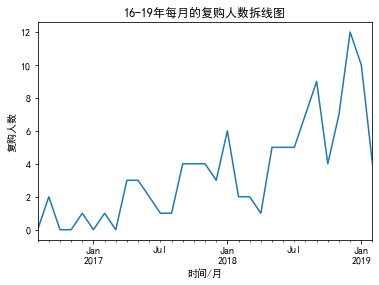

In [34]:
pivot_count.sum().plot()
plt.xlabel('时间/月')
plt.ylabel('复购人数')
plt.title('16-19年每月的复购人数拆线图')
# 整体来看，复购人数呈现上升趋势
# 但是在18年2，3，4，10和19年2月，复购人数下降较为明显，出现异常信号，需要和业务部门具体分析

## 回购率分析

In [35]:
# 回购率：在某一个时间窗口内消费过的用户，在下一个时间窗口仍旧消费的占比
# 举个例子：当前月消费用户人数1000人，其中200人在下一个月仍旧进行了消费，回购率200/1000=20%
pivot_purchase=df.pivot_table(index='author',
                           columns='month',
                           values='frequency',
                           aggfunc='count').fillna(0)
pivot_purchase.head()

month,2016-08-01,2016-09-01,2016-10-01,2016-11-01,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,...,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01
author,,,,,,,,,,,,,,,,,,,,,
wenbiao,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Goh Yu Wen Eunice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hui Shan,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Huihui,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KO-CHENG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
len(pivot_purchase.columns) #得出一共有31个月份

31

In [37]:
def purchase_return(data):# data:代表的是每一名游客的所有月份消费记录
    status=[]# 存储每一个月回购状态
    for i in range(30): # 遍历每一个月（最后一个月除外）
        ####本月消费
        if data[i]==1:
            if data[i+1]==1:# 下个月有消费，是回购用户，1
                status.append(1)
            else: #na|未消费
                 status.append(0)# 非回购用户，0
        else:####本月未消费
            status.append(np.NAN)
    status.append(np.NAN) # 前面30个月循环，最后一个月统一加nan
    return pd.Series(status,pivot_purchase.columns)# 返回一行数据，对应值 (status,pivot_purchase.columns)
pivot_purchase_return=pivot_purchase.apply(purchase_return,axis=1)   #用户回购状态

In [38]:
pivot_purchase_return.sum() #月回购人数

month
2016-08-01     0.0
2016-09-01     0.0
2016-10-01     0.0
2016-11-01     0.0
2016-12-01     2.0
2017-01-01     1.0
2017-02-01     1.0
2017-03-01     2.0
2017-04-01     2.0
2017-05-01     2.0
2017-06-01     0.0
2017-07-01     3.0
2017-08-01     2.0
2017-09-01     3.0
2017-10-01     3.0
2017-11-01     6.0
2017-12-01     4.0
2018-01-01     2.0
2018-02-01     4.0
2018-03-01     3.0
2018-04-01     2.0
2018-05-01    12.0
2018-06-01    14.0
2018-07-01    11.0
2018-08-01     6.0
2018-09-01    10.0
2018-10-01    12.0
2018-11-01    17.0
2018-12-01     8.0
2019-01-01     8.0
2019-02-01     0.0
dtype: float64

In [39]:
pivot_purchase_return.count() #月总的用户数

month
2016-08-01     15
2016-09-01     25
2016-10-01     61
2016-11-01     64
2016-12-01    106
2017-01-01     84
2017-02-01     88
2017-03-01    116
2017-04-01    144
2017-05-01    159
2017-06-01    167
2017-07-01    203
2017-08-01    232
2017-09-01    232
2017-10-01    317
2017-11-01    357
2017-12-01    378
2018-01-01    398
2018-02-01    252
2018-03-01    307
2018-04-01    147
2018-05-01    309
2018-06-01    424
2018-07-01    469
2018-08-01    472
2018-09-01    384
2018-10-01    539
2018-11-01    543
2018-12-01    576
2019-01-01    559
2019-02-01      0
dtype: int64

Text(0, 0.5, '回购率%')

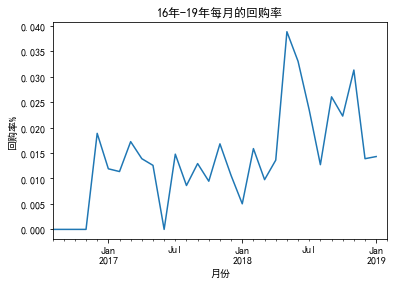

In [40]:
# 求回购率，并绘制拆线较
(pivot_purchase_return.sum() /pivot_purchase_return.count()).plot()
plt.title('16年-19年每月的回购率')
plt.xlabel('月份')
plt.ylabel('回购率%')
#回购率最高在18年6月份，达到4%
#整体来看，回购率呈现微弱上升趋势
#出现 了几次较大下滑，分别是17年6月份，18年1月份，18年8月份，19年1月份

## 回购人数分析

Text(0, 0.5, '回购人数')

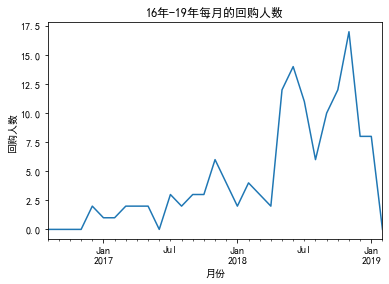

In [41]:
pivot_purchase_return.sum().plot()
plt.title('16年-19年每月的回购人数')
plt.xlabel('月份')
plt.ylabel('回购人数')
#整体呈现上升趋势，回购人数最多时在18年11月份，人数为17人
#其中有几次回购人数下降较为明显，主要在分别是17年6月，18年1月，18年8月，19年1月

In [42]:
# 想看具体人数，可以打印出来
print(pivot_purchase_return.sum())

month
2016-08-01     0.0
2016-09-01     0.0
2016-10-01     0.0
2016-11-01     0.0
2016-12-01     2.0
2017-01-01     1.0
2017-02-01     1.0
2017-03-01     2.0
2017-04-01     2.0
2017-05-01     2.0
2017-06-01     0.0
2017-07-01     3.0
2017-08-01     2.0
2017-09-01     3.0
2017-10-01     3.0
2017-11-01     6.0
2017-12-01     4.0
2018-01-01     2.0
2018-02-01     4.0
2018-03-01     3.0
2018-04-01     2.0
2018-05-01    12.0
2018-06-01    14.0
2018-07-01    11.0
2018-08-01     6.0
2018-09-01    10.0
2018-10-01    12.0
2018-11-01    17.0
2018-12-01     8.0
2019-01-01     8.0
2019-02-01     0.0
dtype: float64


## 每个月分层用户占比情况

In [43]:
# 活跃用户、不活跃用户，回流用户、新用户
def active_status(data): # data:每一行数据（共31列）
    status=[]# 存储用户31个月的状态（new\active\unactive\return\unreg)
    for i in range(31):
        #判断本月没有消费==0
        if data[i]==0:
            if len(status)==0:#前几个月没有任何记录（也就是97年1月==0）
                status.append('unreg')
            else:# 之前的月份有记录（判断上一个月状态）
                if status[i-1]=='unreg':#一直没有消费过
                    status.append('unreg')
                else:# 上个月的状态可能是：new\active\unative\return
                    status.append('unactive')
        else:# 本月有消费==1
            if len(status)==0:
                status.append('new')# 第一次消费
            else:# 之前的月份有记录（判断上一个月状态）
                if status[i-1]=='unactive':
                    status.append('return')#前几个月不活跃，现在又回来消费了，回流用户
                elif status[i-1]=='unreg':
                    status.append('new')#第一次消费
                    
                else:#new\active
                    status.append('active')#活跃用户
                    
    return pd.Series(status,pivot_purchase.columns) #值：status,列名：31个月份

pivot_purchase_states=pivot_purchase.apply(active_status,axis=1)# 得到用户分层结果
pivot_purchase_states.head()

month,2016-08-01,2016-09-01,2016-10-01,2016-11-01,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,...,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01
author,,,,,,,,,,,,,,,,,,,,,
wenbiao,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,...,unreg,unreg,unreg,unreg,unreg,unreg,unreg,new,unactive,unactive
Goh Yu Wen Eunice,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,...,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
Hui Shan,unreg,unreg,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,...,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
Huihui,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,...,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
KO-CHENG,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,...,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive


In [44]:
# unreg不去考虑，替换成NAN
pivot_purchase_states.replace('unreg',np.NaN)

month,2016-08-01,2016-09-01,2016-10-01,2016-11-01,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,...,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01
author,,,,,,,,,,,,,,,,,,,,,
wenbiao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,new,unactive,unactive
Goh Yu Wen Eunice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
Hui Shan,NaN,NaN,NaN,NaN,new,unactive,unactive,unactive,unactive,unactive,...,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
Huihui,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
KO-CHENG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
芊羽,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
華山,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
蘇,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive


In [47]:
pivot_purchase_states.replace('unreg',np.NaN).apply(pd.value_counts)#apply默认按列操作，也就是axis=0

month,2016-08-01,2016-09-01,2016-10-01,2016-11-01,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,...,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01
active,NaN,NaN,NaN,NaN,NaN,2,1,1,2,2,...,2,13,14,11,11,11,14,20,11,9
new,15.0,27.0,61.0,63.0,106.0,81,85,112,142,156,...,266,382,407,420,330,464,461,503,490,352
return,NaN,NaN,NaN,1.0,1.0,1,3,3,3,4,...,46,34,53,48,52,68,75,65,68,45
unactive,NaN,15.0,42.0,102.0,165.0,269,349,434,545,686,...,3599,3866,4228,4643,5059,5373,5827,6292,6801,7316


In [48]:
# 把得到的值存储到一个新的变量里面去
pivot_status_count=pivot_purchase_states.replace('unreg',np.NaN).apply(pd.value_counts)

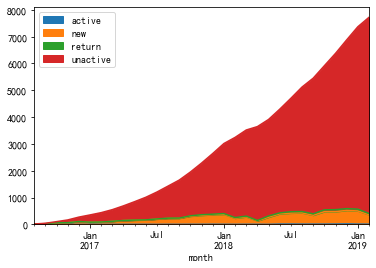

In [49]:
pivot_status_count.T.plot.area()
# 可以看出，红色（不活跃用户）占据网站用户的主体
# 橙色（新用户）从17年的1月-19年1月，呈现上升趋势；但是在18年4月份左右，新用户的量突然急剧下降，异常信号
# 以后，新用户又开始慢慢上涨，恢复稳定状态
# 绿色（回流用户），一直维持维持稳定状态，但是在18年2-4月份，出现异常下降情况，异常信号

## 每月不同用户的占比

In [51]:
# 4种用户分别占总人数的比例(x.sum是整列用户之和)
pivot_status_count.apply(lambda x:x/x.sum()) #apply默认按列操作

month,2016-08-01,2016-09-01,2016-10-01,2016-11-01,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,...,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01
active,NaN,NaN,NaN,NaN,NaN,0.005666,0.002283,0.001818,0.002890,0.002358,...,0.000511,0.003027,0.002977,0.002148,0.002018,0.001859,0.002195,0.002907,0.001493,0.001166
new,1.0,0.642857,0.592233,0.379518,0.389706,0.229462,0.194064,0.203636,0.205202,0.183962,...,0.067979,0.088941,0.086559,0.081999,0.060528,0.078431,0.072291,0.073110,0.066486,0.045584
return,NaN,NaN,NaN,0.006024,0.003676,0.002833,0.006849,0.005455,0.004335,0.004717,...,0.011756,0.007916,0.011272,0.009371,0.009538,0.011494,0.011761,0.009448,0.009227,0.005828
unactive,NaN,0.357143,0.407767,0.614458,0.606618,0.762040,0.796804,0.789091,0.787572,0.808962,...,0.919755,0.900116,0.899192,0.906482,0.927916,0.908215,0.913753,0.914535,0.922795,0.947423


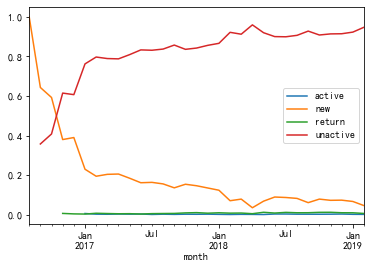

In [52]:
return_rate=pivot_status_count.apply(lambda x:x/x.sum())
return_rate.T.plot()
# 在17年1月份过后，网站用户主体由不活跃用户组成，新用户占比开始慢慢下降，并且趋于稳定，稳定在10%左右
# 活跃用户和回流用户，一直很稳定，并且占比较小
# 16年9月前后，新用户和不活跃用户，发生较大的变化，猜测是活动或者节假日造成的

In [ ]:
# 因为绿色线和蓝色线重合了，所以我们单独把这两个拿出来分析

## 每月活跃用户的占比

In [53]:
return_rate

month,2016-08-01,2016-09-01,2016-10-01,2016-11-01,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,...,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01
active,NaN,NaN,NaN,NaN,NaN,0.005666,0.002283,0.001818,0.002890,0.002358,...,0.000511,0.003027,0.002977,0.002148,0.002018,0.001859,0.002195,0.002907,0.001493,0.001166
new,1.0,0.642857,0.592233,0.379518,0.389706,0.229462,0.194064,0.203636,0.205202,0.183962,...,0.067979,0.088941,0.086559,0.081999,0.060528,0.078431,0.072291,0.073110,0.066486,0.045584
return,NaN,NaN,NaN,0.006024,0.003676,0.002833,0.006849,0.005455,0.004335,0.004717,...,0.011756,0.007916,0.011272,0.009371,0.009538,0.011494,0.011761,0.009448,0.009227,0.005828
unactive,NaN,0.357143,0.407767,0.614458,0.606618,0.762040,0.796804,0.789091,0.787572,0.808962,...,0.919755,0.900116,0.899192,0.906482,0.927916,0.908215,0.913753,0.914535,0.922795,0.947423


Text(0.5, 1.0, '每月活跃用户的占比分析')

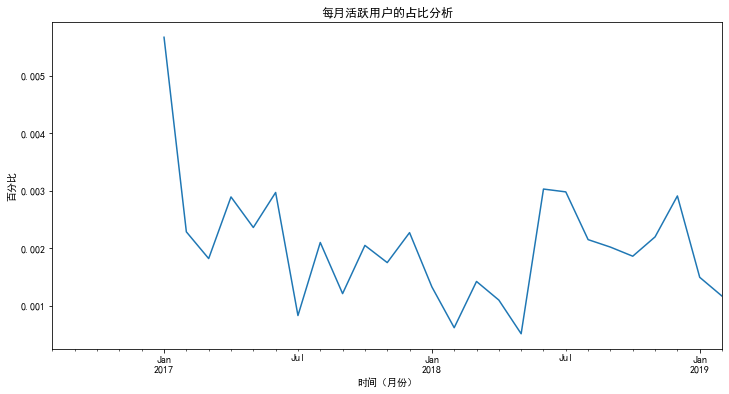

In [55]:
return_rate.T['active'].plot(figsize=(12,6))
plt.xlabel('时间（月份）')
plt.ylabel('百分比')
plt.title('每月活跃用户的占比分析')
# 在17年1月份活跃用户占比较高，在0.5%，但是在1-2月份，急剧下降，猜测：春节的影响，或者温度
# 结合历年1-2月份销量来看，都会出现一定比例的下降，再次验证我们的猜测：春节的影响
# 在18年2月和5月出现 异常，门票销量下降，猜测：雨水或者台风影响

## 每月回流用户的占比

Text(0.5, 1.0, '每月回流用户的占比分析')

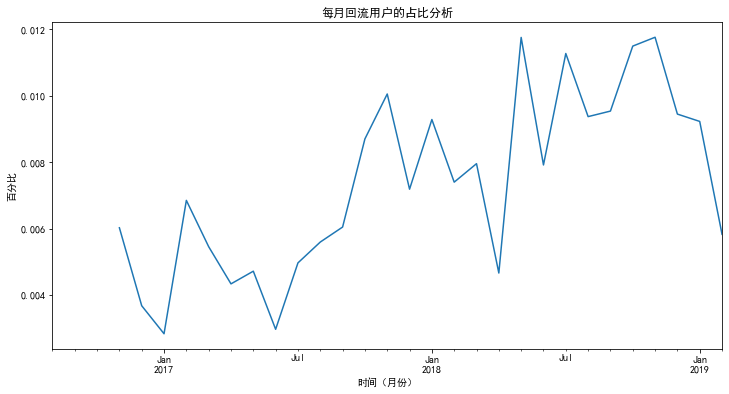

In [57]:
return_rate.T['return'].plot(figsize=(12,6))
plt.xlabel('时间（月份）')
plt.ylabel('百分比')
plt.title('每月回流用户的占比分析')
# 整体来看，回流用户比例上升趋势，但是波动较大
# 在17年1月和6月，18年4月，19年2月，回流用户比例都出现了较大幅度下降，表现为异常信号
# 无论是回流用户还是活跃用户，在以上几个月份中都表现出下降趋势。

In [59]:
# return_rate.T['return'].mean() #回流用户的平均值 在0.73%左右
np.mean(return_rate.T['return']) #用这种方法速度快些
# 在17年9月份以后，仅有两个异常夸海口在平均值以下
# 在17年9月份之前，所有数据都显示出回流用户比例低于平均值 ，猜测：景点开放不久，很多游客尚未发现本景点
# 本平台刚上线不久

0.00736823576229978

## 用户的生命周期

In [60]:
# 计算方式：每一个用户最后一个购买商品的时间-用户第一次购买商品的时间，转换成天数 ，即为生命周期
df

,author,rating,time,year,amount,frequency,month
0,YOUNG,60,2019-02-28,2019,110,1,2019-02-01
1,SHING YAN,100,2019-02-28,2019,110,1,2019-02-01
2,Sha,60,2019-02-28,2019,110,1,2019-02-01
3,Mary Mae,100,2019-02-28,2019,110,1,2019-02-01
4,Maria Cristina,100,2019-02-28,2019,110,1,2019-02-01
...,...,...,...,...,...,...,...
8752,Jonathan,100,2016-08-06,2016,110,1,2016-08-01
8753,Oliver Stephen Ah Kam,100,2016-08-05,2016,110,1,2016-08-01
8754,Halley,100,2016-08-05,2016,110,1,2016-08-01
8755,ANDREW WEIQIANG,100,2016-08-03,2016,110,1,2016-08-01


In [61]:
time_min=df.groupby('author')['time'].min()
time_min

author
      wenbiao        2018-12-31
 Goh Yu Wen Eunice   2017-11-26
 Hui Shan            2016-12-07
 Huihui              2017-09-28
 KO-CHENG            2018-07-16
                        ...    
芊羽                   2018-03-11
華山                   2017-08-14
蘇                    2017-12-10
郁君                   2017-12-25
青慧                   2018-02-28
Name: time, Length: 7722, dtype: datetime64[ns]

In [62]:
time_max=df.groupby('author')['time'].max()
time_max

author
      wenbiao        2018-12-31
 Goh Yu Wen Eunice   2017-11-26
 Hui Shan            2016-12-07
 Huihui              2017-09-28
 KO-CHENG            2018-07-16
                        ...    
芊羽                   2018-03-11
華山                   2017-08-14
蘇                    2017-12-10
郁君                   2017-12-25
青慧                   2018-02-28
Name: time, Length: 7722, dtype: datetime64[ns]

In [68]:
life_time=(time_max-time_min)
life_time

author
      wenbiao        0 days
 Goh Yu Wen Eunice   0 days
 Hui Shan            0 days
 Huihui              0 days
 KO-CHENG            0 days
                      ...  
芊羽                   0 days
華山                   0 days
蘇                    0 days
郁君                   0 days
青慧                   0 days
Name: time, Length: 7722, dtype: timedelta64[ns]

In [69]:
life_time=(time_max-time_min).reset_index() #重新生成索引列
life_time

,author,time
0,wenbiao,0 days
1,Goh Yu Wen Eunice,0 days
2,Hui Shan,0 days
3,Huihui,0 days
4,KO-CHENG,0 days
...,...,...
7717,芊羽,0 days
7718,華山,0 days
7719,蘇,0 days
7720,郁君,0 days


In [70]:
life_time.describe()

,time
count,7722
mean,23 days 01:45:32.867132
std,98 days 16:47:46.849668
min,0 days 00:00:00
25%,0 days 00:00:00
50%,0 days 00:00:00
75%,0 days 00:00:00
max,864 days 00:00:00


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8757 entries, 0 to 8756
Data columns (total 7 columns):
author       8757 non-null object
rating       8757 non-null int64
time         8757 non-null datetime64[ns]
year         8757 non-null int64
amount       8757 non-null int64
frequency    8757 non-null int64
month        8757 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(4), object(1)
memory usage: 479.0+ KB


In [ ]:
# 通过原样本8757条各count=7722得知，存在一个用户多次消费的情况
# 平均生命周期天数23天，通过25%，50%，75%分位数得知，绝大多用户生命周期为0天
# 最大生命周期为864天

## 用户生命周期直方图

In [74]:
life_time

,author,time
0,wenbiao,0 days
1,Goh Yu Wen Eunice,0 days
2,Hui Shan,0 days
3,Huihui,0 days
4,KO-CHENG,0 days
...,...,...
7717,芊羽,0 days
7718,華山,0 days
7719,蘇,0 days
7720,郁君,0 days


In [75]:
life_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7722 entries, 0 to 7721
Data columns (total 2 columns):
author    7722 non-null object
time      7722 non-null timedelta64[ns]
dtypes: object(1), timedelta64[ns](1)
memory usage: 120.8+ KB


Text(0.5, 1.0, '所有用户的生命周期直方图')

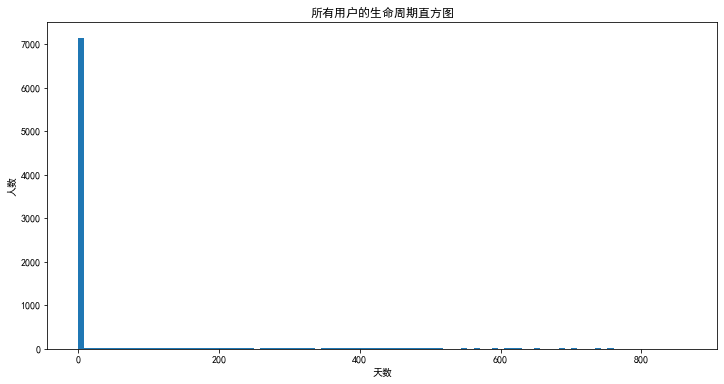

In [78]:
# 日期类型转成数值类型，保留1位小数，格式化为天（把日期格式转成精度为天的格式）
life_time['life_time']=life_time['time']/np.timedelta64(1,'D')
life_time['life_time'].plot.hist(bins=100,figsize=(12,6))
plt.xlabel('天数')
plt.ylabel('人数')
plt.title('所有用户的生命周期直方图')
# 生命周期为0的用户（仅仅在一天内有过消费，之后再没消费过），存在7130个用户
# 由于总用户数为7722，其余592人属于优质的忠诚客户

In [79]:
print(life_time[life_time['life_time']==0])

                  author   time  life_time
0                wenbiao 0 days        0.0
1      Goh Yu Wen Eunice 0 days        0.0
2               Hui Shan 0 days        0.0
3                 Huihui 0 days        0.0
4               KO-CHENG 0 days        0.0
...                  ...    ...        ...
7717                  芊羽 0 days        0.0
7718                  華山 0 days        0.0
7719                   蘇 0 days        0.0
7720                  郁君 0 days        0.0
7721                  青慧 0 days        0.0

[7130 rows x 3 columns]


In [ ]:
# 因为后面的客户不直观，我们单独取出来分析（生命周期大于0的客户）

## 生命周期大于0天的用户，直方图

In [80]:
life_time[life_time['life_time']>0]

,author,time,life_time
49,ANGELINA,226 days,226.0
74,ARLENE,146 days,146.0
83,Aaron,655 days,655.0
90,Abigail,430 days,430.0
93,Ace,152 days,152.0
...,...,...,...
7615,yanyan,113 days,113.0
7626,yewon,28 days,28.0
7646,yinung,28 days,28.0
7660,yu,2 days,2.0


In [81]:
life_time[life_time['life_time']>0]['life_time'] #单独把这一列取出来

49      226.0
74      146.0
83      655.0
90      430.0
93      152.0
        ...  
7615    113.0
7626     28.0
7646     28.0
7660      2.0
7664    127.0
Name: life_time, Length: 592, dtype: float64

In [84]:
life_time[life_time['life_time']>0]['life_time']


49      226.0
74      146.0
83      655.0
90      430.0
93      152.0
        ...  
7615    113.0
7626     28.0
7646     28.0
7660      2.0
7664    127.0
Name: life_time, Length: 592, dtype: float64

300.9662162162162

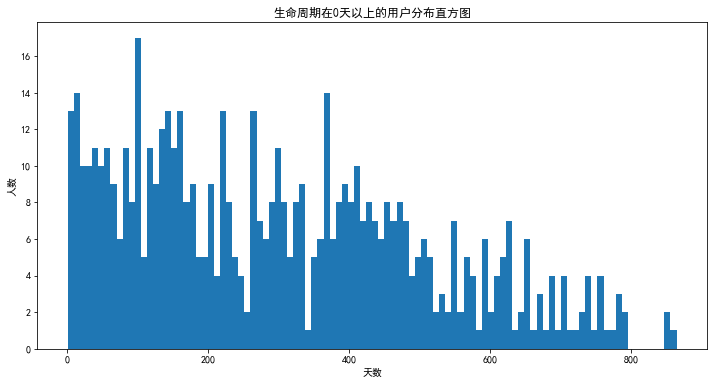

In [86]:
life_time[life_time['life_time']>0]['life_time'].plot.hist(bins=100,figsize=(12,6))
plt.xlabel('天数')
plt.ylabel('人数')
plt.title('生命周期在0天以上的用户分布直方图')
life_time[life_time['life_time']>0]['life_time'].mean()
# 去掉生命周期为0的用户，可知，用户平均生命周期为300天，生命周期在100天的用户量达到了最大值17人
# 生命周期在100-350天来看，用户量呈现缓慢下降的趋势
# 350-800天左右来看，用户量下降速度明显，存在一定用户流失，而忠诚用户越来越少

## 各时间段的用户留存率

In [87]:
# pd.cut()函数
np.random.seed(666) #保证每次运行程序产生的随机数都是相同的
score_list=np.random.randint(25,100,size=3)# #25分-100分之间，产生3个
score_list # 如果没有这句：np.random.seed(666)，每次运行产生的3个数都会不一样

array([27, 70, 55])

In [89]:
bins=[0,59,70,80,100]# 指定多个区间
score_cut=pd.cut(score_list,bins)
score_cut #27,70,55分别在下面三个区间

[(0, 59], (59, 70], (0, 59]]
Categories (4, interval[int64]): [(0, 59] < (59, 70] < (70, 80] < (80, 100]]

In [92]:
# 留存率：1-90天有多少留存用户。求出用户的留存天数 ，比如 留存天数==89，属于1-90天内的留存用户
df

,author,rating,time,year,amount,frequency,month
0,YOUNG,60,2019-02-28,2019,110,1,2019-02-01
1,SHING YAN,100,2019-02-28,2019,110,1,2019-02-01
2,Sha,60,2019-02-28,2019,110,1,2019-02-01
3,Mary Mae,100,2019-02-28,2019,110,1,2019-02-01
4,Maria Cristina,100,2019-02-28,2019,110,1,2019-02-01
...,...,...,...,...,...,...,...
8752,Jonathan,100,2016-08-06,2016,110,1,2016-08-01
8753,Oliver Stephen Ah Kam,100,2016-08-05,2016,110,1,2016-08-01
8754,Halley,100,2016-08-05,2016,110,1,2016-08-01
8755,ANDREW WEIQIANG,100,2016-08-03,2016,110,1,2016-08-01


In [91]:
#留存天数计算方式：用户每一次的消费时间分别减去用户第一次消费时间
time_min #这样只是一维数据series

author
      wenbiao        2018-12-31
 Goh Yu Wen Eunice   2017-11-26
 Hui Shan            2016-12-07
 Huihui              2017-09-28
 KO-CHENG            2018-07-16
                        ...    
芊羽                   2018-03-11
華山                   2017-08-14
蘇                    2017-12-10
郁君                   2017-12-25
青慧                   2018-02-28
Name: time, Length: 7722, dtype: datetime64[ns]

In [93]:
#增加索引就转成了dataframe格式
time_min.reset_index()

,author,time
0,wenbiao,2018-12-31
1,Goh Yu Wen Eunice,2017-11-26
2,Hui Shan,2016-12-07
3,Huihui,2017-09-28
4,KO-CHENG,2018-07-16
...,...,...
7717,芊羽,2018-03-11
7718,華山,2017-08-14
7719,蘇,2017-12-10
7720,郁君,2017-12-25


In [95]:
#retention留存的意思
#left:左表，right：右表，how:连接方式，on:连接字段，suffixes:针对相同列名，指定不同的后缀
user_purchase_retention=pd.merge(left=df,right=time_min.reset_index(),how='inner',on='author',suffixes=('','_min'))
user_purchase_retention

,author,rating,time,year,amount,frequency,month,time_min
0,YOUNG,60,2019-02-28,2019,110,1,2019-02-01,2019-02-28
1,SHING YAN,100,2019-02-28,2019,110,1,2019-02-01,2019-02-28
2,Sha,60,2019-02-28,2019,110,1,2019-02-01,2019-02-28
3,Mary Mae,100,2019-02-28,2019,110,1,2019-02-01,2019-02-28
4,Maria Cristina,100,2019-02-28,2019,110,1,2019-02-01,2017-06-27
...,...,...,...,...,...,...,...,...
8752,CHI NANG,100,2016-08-07,2016,110,1,2016-08-01,2016-08-07
8753,Oliver Stephen Ah Kam,100,2016-08-05,2016,110,1,2016-08-01,2016-08-05
8754,Halley,100,2016-08-05,2016,110,1,2016-08-01,2016-08-05
8755,ANDREW WEIQIANG,100,2016-08-03,2016,110,1,2016-08-01,2016-08-03


In [97]:
# 计算留存天数
user_purchase_retention['time_diff']=user_purchase_retention['time']-user_purchase_retention['time_min']
user_purchase_retention

,author,rating,time,year,amount,frequency,month,time_min,time_diff
0,YOUNG,60,2019-02-28,2019,110,1,2019-02-01,2019-02-28,0 days
1,SHING YAN,100,2019-02-28,2019,110,1,2019-02-01,2019-02-28,0 days
2,Sha,60,2019-02-28,2019,110,1,2019-02-01,2019-02-28,0 days
3,Mary Mae,100,2019-02-28,2019,110,1,2019-02-01,2019-02-28,0 days
4,Maria Cristina,100,2019-02-28,2019,110,1,2019-02-01,2017-06-27,611 days
...,...,...,...,...,...,...,...,...,...
8752,CHI NANG,100,2016-08-07,2016,110,1,2016-08-01,2016-08-07,0 days
8753,Oliver Stephen Ah Kam,100,2016-08-05,2016,110,1,2016-08-01,2016-08-05,0 days
8754,Halley,100,2016-08-05,2016,110,1,2016-08-01,2016-08-05,0 days
8755,ANDREW WEIQIANG,100,2016-08-03,2016,110,1,2016-08-01,2016-08-03,0 days


In [98]:
# 将time_diff转成数值
user_purchase_retention['time_diff']=user_purchase_retention['time_diff'].apply(lambda x:x/np.timedelta64(1,'D'))
user_purchase_retention

,author,rating,time,year,amount,frequency,month,time_min,time_diff
0,YOUNG,60,2019-02-28,2019,110,1,2019-02-01,2019-02-28,0.0
1,SHING YAN,100,2019-02-28,2019,110,1,2019-02-01,2019-02-28,0.0
2,Sha,60,2019-02-28,2019,110,1,2019-02-01,2019-02-28,0.0
3,Mary Mae,100,2019-02-28,2019,110,1,2019-02-01,2019-02-28,0.0
4,Maria Cristina,100,2019-02-28,2019,110,1,2019-02-01,2017-06-27,611.0
...,...,...,...,...,...,...,...,...,...
8752,CHI NANG,100,2016-08-07,2016,110,1,2016-08-01,2016-08-07,0.0
8753,Oliver Stephen Ah Kam,100,2016-08-05,2016,110,1,2016-08-01,2016-08-05,0.0
8754,Halley,100,2016-08-05,2016,110,1,2016-08-01,2016-08-05,0.0
8755,ANDREW WEIQIANG,100,2016-08-03,2016,110,1,2016-08-01,2016-08-03,0.0


In [99]:
# 生成时间跨度（3个月，即90天），判断属于哪个区间
bin=[i*90 for i in range(11)] #从0开始，生成10个数，生命周期最大是900多天，那就是90的位数
bin

[0, 90, 180, 270, 360, 450, 540, 630, 720, 810, 900]

In [102]:
#判断区间
user_purchase_retention['time_diff_bin']=pd.cut(user_purchase_retention['time_diff'],bin)
user_purchase_retention                                                                               

,author,rating,time,year,amount,frequency,month,time_min,time_diff,time_diff_bin
0,YOUNG,60,2019-02-28,2019,110,1,2019-02-01,2019-02-28,0.0,NaN
1,SHING YAN,100,2019-02-28,2019,110,1,2019-02-01,2019-02-28,0.0,NaN
2,Sha,60,2019-02-28,2019,110,1,2019-02-01,2019-02-28,0.0,NaN
3,Mary Mae,100,2019-02-28,2019,110,1,2019-02-01,2019-02-28,0.0,NaN
4,Maria Cristina,100,2019-02-28,2019,110,1,2019-02-01,2017-06-27,611.0,"(540.0, 630.0]"
...,...,...,...,...,...,...,...,...,...,...
8752,CHI NANG,100,2016-08-07,2016,110,1,2016-08-01,2016-08-07,0.0,NaN
8753,Oliver Stephen Ah Kam,100,2016-08-05,2016,110,1,2016-08-01,2016-08-05,0.0,NaN
8754,Halley,100,2016-08-05,2016,110,1,2016-08-01,2016-08-05,0.0,NaN
8755,ANDREW WEIQIANG,100,2016-08-03,2016,110,1,2016-08-01,2016-08-03,0.0,NaN


In [113]:
# 统计每个游客，在不同的时间段内的消费频率和值（全球稍后判断 该用户在某个区间内是不是留存用户）
# 每名游客在每个留存时间段的数据，取这名游客对应时间段的频率，求和
pivot_retention=user_purchase_retention.groupby(['author','time_diff_bin'])['frequency'].sum().unstack()
pivot_retention

time_diff_bin,"(0, 90]","(90, 180]","(180, 270]","(270, 360]","(360, 450]","(450, 540]","(540, 630]","(630, 720]","(720, 810]","(810, 900]"
author,,,,,,,,,,
wenbiao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Goh Yu Wen Eunice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hui Shan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Huihui,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KO-CHENG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
芊羽,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
華山,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
蘇,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
# 判断是否是留存用户（1：留存，0：未留存),trans(变化的意思)
pivot_retention_trans=pivot_retention.fillna(0).applymap(lambda x:1 if x>0 else 0)
pivot_retention_trans.head(60)

time_diff_bin,"(0, 90]","(90, 180]","(180, 270]","(270, 360]","(360, 450]","(450, 540]","(540, 630]","(630, 720]","(720, 810]","(810, 900]"
author,,,,,,,,,,
wenbiao,0,0,0,0,0,0,0,0,0,0
Goh Yu Wen Eunice,0,0,0,0,0,0,0,0,0,0
Hui Shan,0,0,0,0,0,0,0,0,0,0
Huihui,0,0,0,0,0,0,0,0,0,0
KO-CHENG,0,0,0,0,0,0,0,0,0,0
TING SHAN,0,0,0,0,0,0,0,0,0,0
A,0,0,0,0,0,0,0,0,0,0
A RAM,0,0,0,0,0,0,0,0,0,0
ABIGAIL BEATRICE,0,0,0,0,0,0,0,0,0,0


In [126]:
# 留存率
pivot_retention_trans.sum()/pivot_retention_trans.count() #对当前列求和，默认是axis=0

time_diff_bin
(0, 90]       0.022663
(90, 180]     0.019814
(180, 270]    0.016058
(270, 360]    0.014893
(360, 450]    0.014375
(450, 540]    0.009842
(540, 630]    0.007641
(630, 720]    0.004921
(720, 810]    0.002720
(810, 900]    0.000389
dtype: float64

Text(0.5, 1.0, '各时间段内的用户留存率')

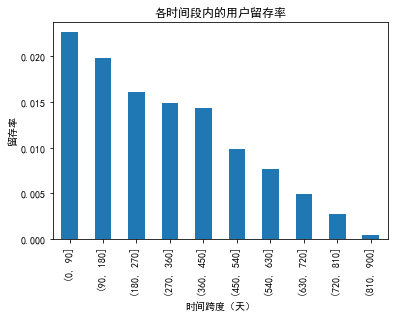

In [128]:
(pivot_retention_trans.sum()/pivot_retention_trans.count()).plot.bar()
plt.xlabel('时间跨度（天）')
plt.ylabel('留存率')
plt.title('各时间段内的用户留存率')

In [ ]:
# 如图：每个周期是3个月，第一个周期的留存率真在2.2%，前三个周期的递减速度在0.3%左右。
# 在第四五个周期的时候趋于平稳，稳定在留存率1.5%左右
# 从第五个周期开始，留存率真明显下降，下降到几乎0%，在第四五周期（1年）的时候，需要采取方法将用户留住进行再次消费
# 如果在跨度为1年的时候，不召回用户，则就会面临大量用户流失的风险 

## 用户平均购买周期直言图

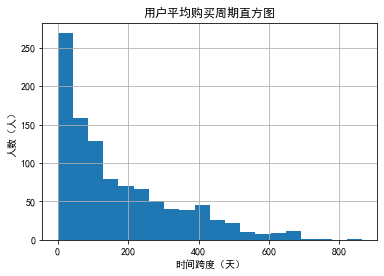

In [131]:
#创建函数，返回时间差
def diff(group):
    d= abs(group.time_diff - group.time_diff.shift(-1))
    return d
last_diff = user_purchase_retention.groupby('author').apply(diff)
ax = last_diff.hist(bins = 20)
ax.set_xlabel('时间跨度（天）') 
ax.set_ylabel('人数（人）') 
ax.set_title('用户平均购买周期直方图')
plt.show()


In [ ]:
print(life_time_gm0.mean())